# Letters of the Republic Network statistics and visualizations

In this Juypiter Notebook we will generate the final results stemming from the Letters of the Republic Project. These statistics are based upon data gathered and filtered from [People of the Founding Era](https://pfe.rotunda.upress.virginia.edu/) (PFE) as well as the [Founders Online](https://www.founders.archives.gov/) archive. 

In [1]:
#importing the relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#opening the relevant files
os.path.normpath(os.getcwd() + os.sep + os.pardir)
nodelist = pd.read_csv("../data/network_data/pfe_data/filtered_nodes_w_bio_data.csv")
nodestats = pd.read_csv("../data/network_data/gephi_output/filtered_lotrp_nodes.csv")
edgelist = pd.read_csv("../data/network_data/gephi_output/filtered_lotrp_edges.csv")

## Biographical data

In this section we will look at measurements based on the biographical data provided by PFE, in some cases combined with edge and node data. We will look at statistics about age; gender; occupation, nationality, formal role and memberships of other organisations.

### General stats

In [3]:
#calculating the amount of actors and letters in dataset and 
print(f'amount of actors: {len(nodelist)}')
print( 'amount of letters', edgelist['Weight'].sum())

amount of actors: 302
amount of letters 26971


In [4]:
#querying the gender of the actors. "O" stands for organization.
print('amount per gender:')
print(nodelist['Gender'].value_counts())

amount per gender:
M    271
O     24
V      6
Name: Gender, dtype: int64


In [5]:
#calculating the various age statistics based on the year 1775.
yearborn = nodelist['Year born'].dropna().astype('int')
yearborn['age'] = 1775 - yearborn
print(yearborn['age'].describe().astype('int'))

count    253
mean      35
std       11
min        7
25%       28
50%       35
75%       43
max       75
Name: Year born, dtype: int32


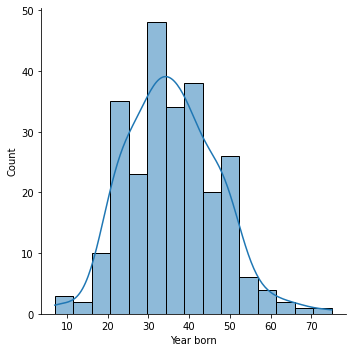

In [6]:
#graphing age distribution in 1775.
print(sns.displot(yearborn['age'].astype('int'),kde=True))

### Nationality

Section describing nationality statistics. Each U.S. state is taken seperately when it comes to nationality, except for organizations related to the U.S. who will be counted under the "United States" label. 

<AxesSubplot:xlabel='Nationality/State', ylabel='index'>

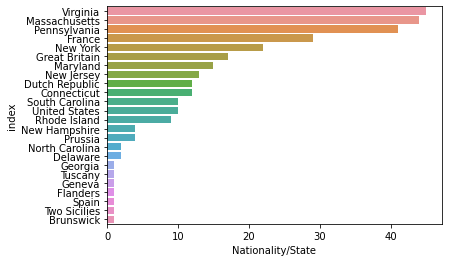

In [7]:
#graphing the distribution of nationalities.
nationality = nodelist['Nationality/State'].str.split(';').explode().str.strip().value_counts().reset_index()
sns.barplot(data= nationality, x='Nationality/State',y='index')

In [8]:
#Calculating the proportion of actors from top 5 nationalities & the United States.
top_5_nationalities=['Virginia','Pennsylvania','Massachusetts','France','New York']
united_states = ['Connecticut','Massachusetts','New Hampshire','Pennsylvania','Maryland','Delaware',
         'Rhode Island','New York','New Jersey','Virginia','North Carolina','South Carolina','Georgia','United States']

print('Proportion of actors from the top 5 nationalities:',nationality['Nationality/State'].loc[nationality['index'].isin(top_5_nationalities)].sum()/nationality['Nationality/State'].sum())
print('Proportion of actors from the United States:',nationality['Nationality/State'].loc[nationality['index'].isin(united_states)].sum()/nationality['Nationality/State'].sum())

Proportion of actors from the top 5 nationalities: 0.6073825503355704
Proportion of actors from the United States: 0.7718120805369127


In [9]:
#defining function to calculate the amount of letters send and received by one or more individuals
# to one of more states/countries.
def state_factor(edgelist, nodelist, names, states):
  state_factor_auth = edgelist.loc[edgelist['Source'] == names]
  state_factor_auth = pd.merge(state_factor_auth[['Source','Target','Weight']],nodelist,left_on='Target',right_on='Names')
  state_factor_authored = state_factor_auth[['Nationality/State','Weight']].set_index(['Weight']).apply(lambda x: x.str.split(';')).explode('Nationality/State').reset_index()
  state_factor_authored = state_factor_authored.loc[state_factor_authored['Nationality/State'].isin(states)]
  state_factor_authored = state_factor_authored['Weight'].sum()/state_factor_auth['Weight'].sum()*100
  
  state_factor_rec = edgelist.loc[edgelist['Target'] == names]
  state_factor_rec = pd.merge(state_factor_rec[['Source','Target','Weight']],nodelist,left_on='Source',right_on='Names')
  state_factor_recip = state_factor_rec[['Nationality/State','Weight']].set_index(['Weight']).apply(lambda x: x.str.split(';')).explode('Nationality/State').reset_index()
  state_factor_recip = state_factor_recip.loc[state_factor_recip['Nationality/State'].isin(states)]
  state_factor_recip = state_factor_recip['Weight'].sum()/state_factor_rec['Weight'].sum()*100

  state_factor = (state_factor_authored+state_factor_recip)/2
  return state_factor_authored,state_factor_recip, state_factor

In [10]:
#executing the previous function.
text=", "
dicteroo = {}
founders = ['Washington, George', 'Adams, John', 'Jefferson, Thomas', 
              'Madison, James', 'Hamilton, Alexander', 'Franklin, Benjamin','Jay, John'] #can add or remove people here
states = ['Connecticut','Massachusetts','New Hampshire','Pennsylvania','Maryland','Delaware', 
         'Rhode Island','New York','New Jersey','Virginia','North Carolina','South Carolina','Georgia','United States'] #can add or remove states here

for names in founders:
  dicteroo[names] = state_factor(edgelist, nodelist, names, states)
df = pd.DataFrame(dicteroo).T
df.columns = ['to', 'from', 'combined']

print(f'Percentage of letters to and from people associated with {text.join(states)}: \n')
print(df.round(decimals=2).sort_values(by=['combined'], ascending=False))

Percentage of letters to and from people associated with Connecticut, Massachusetts, New Hampshire, Pennsylvania, Maryland, Delaware, Rhode Island, New York, New Jersey, Virginia, North Carolina, South Carolina, Georgia, United States: 

                        to   from  combined
Madison, James       99.59  97.30     98.44
Washington, George   94.17  92.93     93.55
Jay, John            91.36  88.09     89.72
Hamilton, Alexander  89.31  85.50     87.40
Jefferson, Thomas    87.35  87.22     87.28
Adams, John          78.45  59.32     68.88
Franklin, Benjamin   54.16  59.20     56.68


In [11]:
#executing the previous function.
text=", "
dicteroo = {}
founders = ['Washington, George', 'Adams, John', 'Jefferson, Thomas', 
              'Madison, James', 'Hamilton, Alexander', 'Franklin, Benjamin','Jay, John'] #can add or remove people here
states = ['Virginia'] #can add or remove states here

for names in founders:
  dicteroo[names] = state_factor(edgelist, nodelist, names, states)
df = pd.DataFrame(dicteroo).T
df.columns = ['to', 'from', 'combined']

print(f'Percentage of letters to and from people associated with {text.join(states)}: \n')
print(df.round(decimals=2).sort_values(by=['combined'], ascending=False))

Percentage of letters to and from people associated with Virginia: 

                        to   from  combined
Madison, James       96.33  94.98     95.65
Jefferson, Thomas    61.37  57.02     59.19
Jay, John            46.91  55.60     51.25
Hamilton, Alexander  20.19  26.34     23.26
Washington, George   12.66  13.28     12.97
Franklin, Benjamin   11.07   8.96     10.02
Adams, John           4.05   6.41      5.23


In [12]:
#counts the nationalities for a specified cluster.
modclass_1 = nodestats.loc[nodestats['modularity_class'] == 0] #can change the number to be either 0,1,2
modclass_1 = pd.merge(modclass_1['Id'],nodelist,left_on='Id',right_on='Names')
modclass_1_nat = modclass_1['Nationality/State'].str.split(';').explode().str.strip()
modclass_1_nat.value_counts()

Pennsylvania      20
New York          19
Virginia          15
Massachusetts     13
Great Britain     10
New Jersey        10
Connecticut        9
France             9
South Carolina     5
Maryland           4
Rhode Island       3
United States      2
New Hampshire      2
Delaware           1
Prussia            1
Georgia            1
Name: Nationality/State, dtype: int64

### Occupations

Section dealing with people's professional occupations during or before the American Revolution. People can (and do!) have multiple occupations. The labels are loosly based on the HRAF standards also employed at PFE.

In [13]:
def convertTuple(tup):
    str = ''.join(tup)
    return str

<ipython-input-14-beb5de81f587>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_occupations = main_occupations.append(pd.Series(other_occupation)).reset_index()


<AxesSubplot:xlabel='index', ylabel='0'>

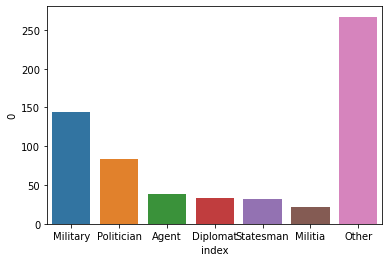

In [14]:
#graphs the main occupations related to government.
occupations = nodelist[['Occupation', 'Id']].set_index('Id').apply(lambda x: x.str.split(';').explode().astype('string').str.strip())
main_occupations = occupations.loc[occupations['Occupation'].isin(['Military','Politician','Diplomat','Statesman','Agent','Militia'])].value_counts()
other_occupation = {'Other':occupations.loc[~occupations['Occupation'].isin(['Military','Politician','Diplomat','Statesman','Agent','Militia'])].value_counts().sum()}
main_occupations = main_occupations.append(pd.Series(other_occupation)).reset_index()
main_occupations['index'] = main_occupations['index'].apply(convertTuple)
sns.barplot(data=main_occupations, x='index',y=0)

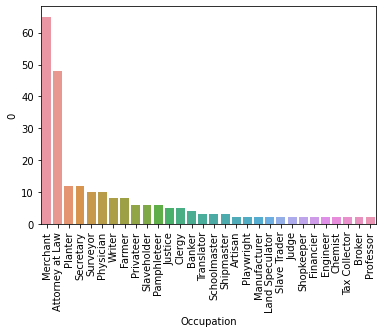

In [15]:
#graphs any other occupation.
other_occupations = occupations.loc[~occupations['Occupation'].isin(['Military','Politician','Diplomat','Statesman','Agent','Militia'])].value_counts().reset_index()
other_occupations = other_occupations.loc[other_occupations[0] > 1]
g = sns.barplot(data= other_occupations, x='Occupation', y=0)
g.set_xticklabels(labels = other_occupations['Occupation'], rotation=90)
plt.show()

In [16]:
#defining function to calculate the amount of letters send and received by one or more individuals
#to one of more occupations.

def occupation_factor(edgelist, nodelist, names, occupation):
  occupation_factor_auth = edgelist.loc[edgelist['Source'] == names]
  occupation_factor_auth = pd.merge(occupation_factor_auth[['Source','Target','Weight']],nodelist,left_on='Target',right_on='Names')
  occupation_factor_authored = occupation_factor_auth[['Occupation','Weight']].set_index(['Weight']).apply(lambda x: x.str.split(';')).explode('Occupation').reset_index()
  occupation_factor_authored = occupation_factor_authored.loc[occupation_factor_authored['Occupation'].isin(occupation)]
  occupation_factor_authored = occupation_factor_authored['Weight'].sum()/occupation_factor_auth['Weight'].sum()*100
  
  occupation_factor_rec = edgelist.loc[edgelist['Target'] == names]
  occupation_factor_rec = pd.merge(occupation_factor_rec[['Source','Target','Weight']],nodelist,left_on='Source',right_on='Names')
  occupation_factor_recip = occupation_factor_rec[['Occupation','Weight']].set_index(['Weight']).apply(lambda x: x.str.split(';')).explode('Occupation').reset_index()
  occupation_factor_recip = occupation_factor_recip.loc[occupation_factor_recip['Occupation'].isin(occupation)]
  occupation_factor_recip = occupation_factor_recip['Weight'].sum()/occupation_factor_rec['Weight'].sum()*100

  occupation_factor = (occupation_factor_authored+occupation_factor_recip)/2
  return occupation_factor_authored,occupation_factor_recip, occupation_factor

In [17]:
#executing the previous function.
text=", "
dicteroo = {}
founders = ['Washington, George', 'Adams, John', 'Jefferson, Thomas', 
              'Madison, James', 'Hamilton, Alexander', 'Franklin, Benjamin','Jay, John'] #can add or remove people here
occupations = ['Politician','Statesman'] #can add or remove occupations here. 

for names in founders:
  dicteroo[names] = occupation_factor(edgelist, nodelist,names,occupations)
df = pd.DataFrame(dicteroo).T
df.columns = ['to', 'from', 'combined']

print(f'Percentage of letters to and from people who were a {text.join(occupations)}: \n')
print(df.round(decimals=2).sort_values(by=['combined'], ascending=False))

Percentage of letters to and from people who were a Politician, Statesman: 

                        to   from  combined
Madison, James       48.57  47.88     48.22
Jay, John            55.56  32.85     44.20
Franklin, Benjamin   41.90  28.78     35.34
Washington, George   40.46  30.17     35.31
Adams, John          36.20  27.33     31.76
Hamilton, Alexander  28.27  29.77     29.02
Jefferson, Thomas    23.52  31.07     27.30


In [18]:
#counts the occupations for a specified cluster.
modclass_1 = nodestats.loc[nodestats['modularity_class'] == 1]
modclass_1 = pd.merge(modclass_1['Id'],nodelist,left_on='Id',right_on='Names')
modclass_1_occ = modclass_1['Position held'].str.split(';').explode().str.strip()
modclass_1_occ.value_counts()

Delegate Continental Congress                    24
Agent in France                                  17
Naval Captain                                    15
State Representative                              9
Peace Commissioner                                4
                                                 ..
Envoy to Austria                                  1
Ambassador of the Kingdom of the Two Sicilies     1
Envoy to Spain                                    1
Lieutenant                                        1
Captain of Associators                            1
Name: Position held, Length: 75, dtype: int64

### Formal roles & memberships

This section records people's formal roles and memberships. The formal role is the more specific 'job title' as opposed to the more general occupations. Also the formal roles relate to government, military and politics related roles held during the Revolutionary war.

Only the memberships of 5 prominent organizations were recorded. In the case of the Society of the Cincinnati only the founding members were recorded as it would strictly fall outside bounds of the war. 

<AxesSubplot:xlabel='0', ylabel='Position held'>

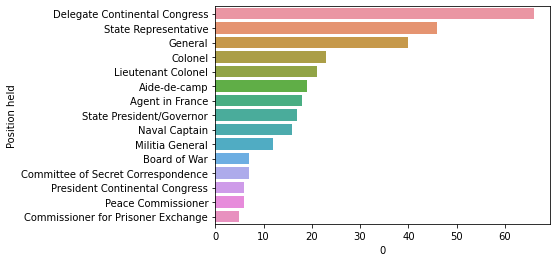

In [19]:
#graphs the top 15 formal roles people held.
position = nodelist[['Position held', 'Id']].set_index('Id').apply(lambda x: x.str.split(';').explode().str.strip())
position = position.value_counts().nlargest(15).sort_values(ascending=False).reset_index()
sns.barplot(data=position, x=0, y='Position held')

<ipython-input-20-23259e0dc085>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  memberships = memberships.value_counts().drop('').sort_values(ascending=False).reset_index()


<AxesSubplot:xlabel='0', ylabel='Other memberships'>

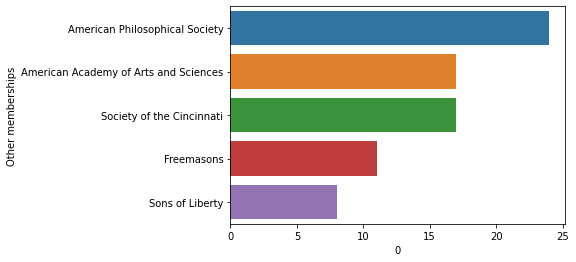

In [20]:
#graphs the recorded membership of actors.
memberships = nodelist[['Other memberships', 'Id']].set_index('Id').apply(lambda x: x.str.split(';').explode().str.strip())
memberships = memberships.value_counts().drop('').sort_values(ascending=False).reset_index()
sns.barplot(data=memberships, x=0, y='Other memberships')

## Network statistics

In [21]:
#Calculating the amount of people per cluster
nodestats['modularity_class'].value_counts().sort_index()

0    122
1    142
2     38
Name: modularity_class, dtype: int64

In [22]:
#presenting description of all the network statistics
nodestats.describe().round(2)

,Label,timeset,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,clustering,eigencentrality,componentnumber,strongcompnum,Authority,Hub,stat_inf_class
count,0.0,0.0,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.0,302.0,302.00,302.00,302.00
mean,NaN,NaN,5.55,5.55,11.10,89.31,89.31,178.62,3.34,0.45,0.47,374.87,0.72,0.86,0.10,0.0,0.0,0.04,0.04,1.76
std,NaN,NaN,18.07,18.07,36.15,445.16,402.55,841.11,0.48,0.05,0.05,3246.83,0.67,0.27,0.10,0.0,0.0,0.04,0.04,0.44
min,NaN,NaN,1.00,1.00,2.00,2.00,2.00,4.00,2.00,0.30,0.31,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
25%,NaN,NaN,2.00,2.00,4.00,5.00,8.00,15.00,3.00,0.43,0.45,0.00,0.00,0.83,0.07,0.0,0.0,0.03,0.03,2.00
50%,NaN,NaN,3.00,3.00,6.00,13.00,19.00,33.50,3.00,0.43,0.45,0.00,1.00,1.00,0.09,0.0,0.0,0.03,0.03,2.00
75%,NaN,NaN,4.00,4.00,8.00,42.00,53.00,97.00,4.00,0.49,0.49,0.12,1.00,1.00,0.11,0.0,0.0,0.04,0.04,2.00
max,NaN,NaN,197.00,197.00,394.00,6477.00,6263.00,12740.00,4.00,0.74,0.83,46234.80,2.00,1.00,1.00,0.0,0.0,0.39,0.39,2.00


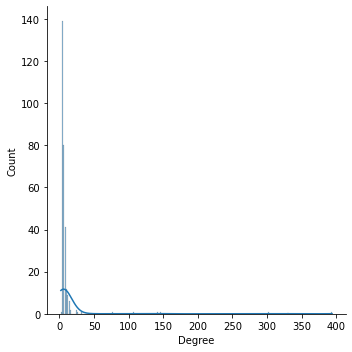

In [23]:
#graphing the degree counts with distribution line.
sns.displot(nodestats['Degree'], kde=True)

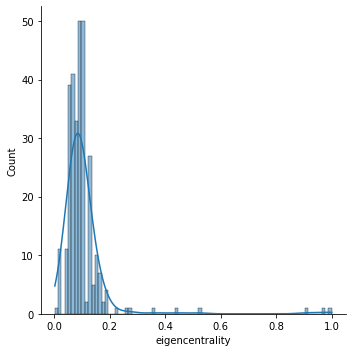

In [24]:
#graphing the eigenfactor centrality (popularity) score with distribution line.

sns.displot(nodestats['eigencentrality'], kde=True)

In [25]:
#normalizing the node statistics.
nodestats_2 = nodestats[['Degree', 'weighted indegree',	'weighted outdegree',	'Weighted Degree', 'Eccentricity','betweenesscentrality']]
nodestats_norm= (nodestats_2-nodestats_2.min())/ (nodestats_2.max() - nodestats_2.min())
nodestats_norm = pd.merge(left=nodestats_norm, right=nodestats[['closnesscentrality','harmonicclosnesscentrality','Authority','Hub','clustering','eigencentrality']], left_index=True,right_index=True)
#nodestats_norm

<AxesSubplot:>

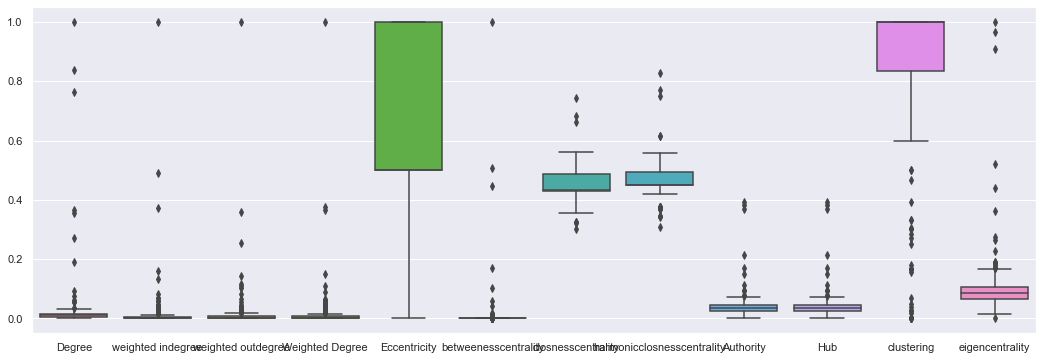

In [26]:
#plotting the normalized node statistics.
sns.set(rc={"figure.figsize":(18, 6)})
sns.boxplot(data=nodestats_norm)